# Predicting Fuel Efficiency of Vehicles

### Machine Learning Project Checklist

1. **Define Problem Statement** 
   - frame the problem based on the dataset description 
2. **Data Collection**
   - use [Auto MPG dataset](https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg)
3. **Exploratory data analysis (EDA)** 
   - initial exploration
   - take aside a sample of it for final testing purposes
   - add a few data visualizations for easy interpretation of the impact of each feature on the target variable
   - analyze the correlation between features
   - creatе new combination of features
4. **Data Preparation** 
   - write functions for data transform
     - clean the data(imputing missing values and handling outliers)
     - handling categorical attributes
   - write functions to select and engineer features
     - drop redundant features
     - attribute addition 
     - format conversion of features
   - feature scaling — standardize the features
   - create a data pipeline to transform the data to be loaded into our ML models
5. **Selecting and Training ML models** 
   - train a few models to evaluate their predictions using cross-validation.
     - Linear Regression
     - Decision Tree
     - RandomForest
     - SVM regressor
   - compare the performance of the models
     - Evaluation using Mean Squared Error
   - study the features that have the most impact on the target
   - analyze the types of errors the models make while predicting
6. **Hyperparameter Tuning** 
   - hyperparameters fine tuning for the most promising models from previous step
     - using GridSearchCV
   - use the unseen test sample that we set aside, in the beginning, to check for overfitting or underfitting
7.  **Deploy the Model** 
   - use FastAPI framework to deploy our trained model on **Heroku**

### Problem Statement

Our goal is to predict efficiency of fuel consumption of a vehicle (70s and 80s)

The dataset contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption 

__questions__ :
- the nature of the problem (supervised,unsupervised,classification,regression)
- what metrics you should use to measure performance
- type of solutions you can develop
- the inherent assumptions of the problem

### Download dataset from UCI ML repository and preview

In [1]:
# importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset file using pandas

# see dataset description in ../datasets/auto-mpg.names
colum_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','Car']

origin_data = pd.read_csv('../datasets/auto-mpg.data', names=colum_names, sep=",")

In [3]:
# preview data
origin_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Exploratory Data Analysis
- Identify the target variable
- Check for Data type of columns
- Check for null values.
- Check for outliers
- Look for the category distribution in categorical columns
- Plot for correlation
- Look for new variables

In [4]:
# checking the data info
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    394 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car           398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# convert horsepower to be numeric
origin_data['Horsepower'] = pd.to_numeric(origin_data['Horsepower'], errors='coerce')

In [6]:
# checking for all the null values
origin_data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car             0
dtype: int64

In [7]:
# summary statistics of numeric variables
origin_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


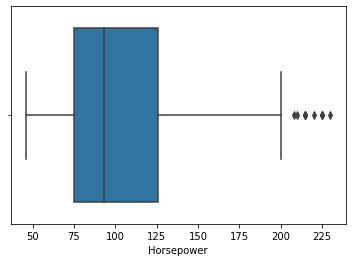

In [8]:
# check Horsepower distribution and outliers
sns.boxplot(x=origin_data['Horsepower'])
plt.show()

In [9]:
# category distribution
cylinders = origin_data["Cylinders"].value_counts() / len(origin_data)
cylinders

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

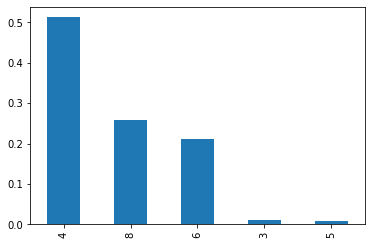

In [10]:
cylinders.plot.bar()
plt.show()

In [11]:
origin = origin_data['Origin'].value_counts()
origin

1    249
3     79
2     70
Name: Origin, dtype: int64

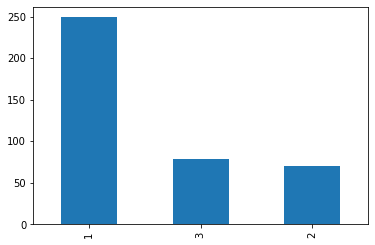

In [12]:
origin.plot.bar()
plt.show()

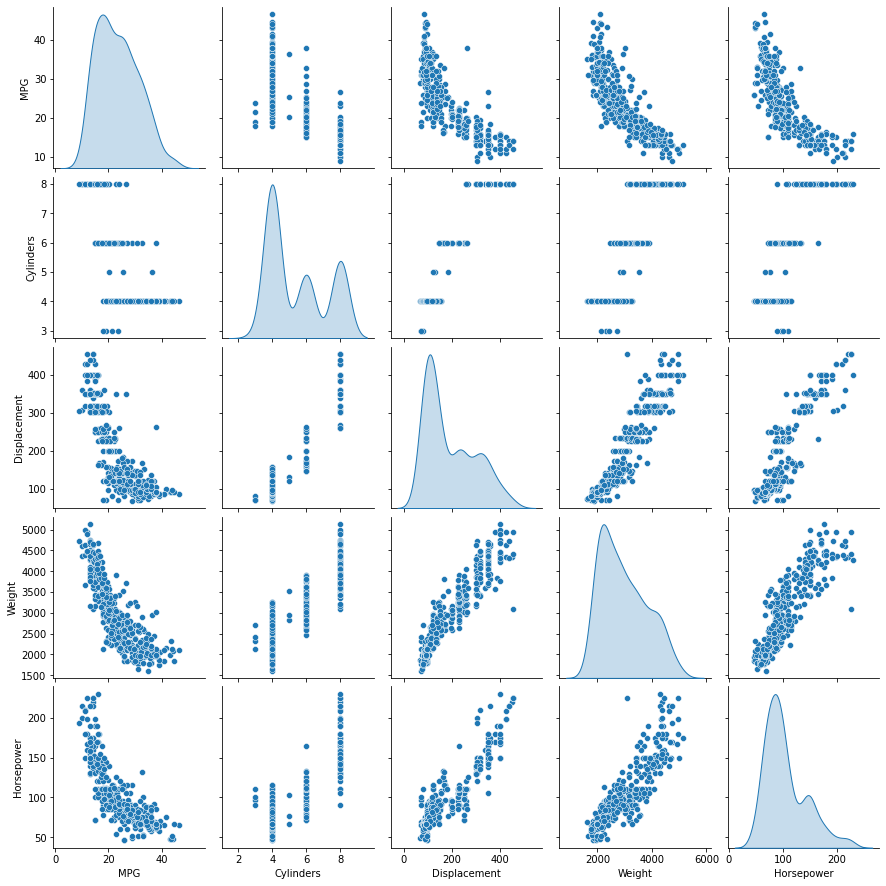

In [13]:
# pairplots to get an intuition of potential correlations
sns.pairplot(
    origin_data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], 
        diag_kind="kde")
plt.show()

### Splitting dataset to training and test

In [14]:
# reading the .data file using pandas
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(origin_data, origin_data["Cylinders"]):
    train_set = origin_data.loc[train_index]
    test_set = origin_data.loc[test_index]   

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           318 non-null    float64
 1   Cylinders     318 non-null    int64  
 2   Displacement  318 non-null    float64
 3   Horsepower    314 non-null    float64
 4   Weight        318 non-null    float64
 5   Acceleration  318 non-null    float64
 6   Model Year    318 non-null    int64  
 7   Origin        318 non-null    int64  
 8   Car           318 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 24.8+ KB


In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 128 to 240
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           80 non-null     float64
 1   Cylinders     80 non-null     int64  
 2   Displacement  80 non-null     float64
 3   Horsepower    78 non-null     float64
 4   Weight        80 non-null     float64
 5   Acceleration  80 non-null     float64
 6   Model Year    80 non-null     int64  
 7   Origin        80 non-null     int64  
 8   Car           80 non-null     object 
dtypes: float64(5), int64(3), object(1)
memory usage: 6.2+ KB


### Segregating Target and Feature variables

In [17]:
train_data = train_set.drop("MPG", axis=1).drop("Car", axis=1)
train_data_labels = train_set["MPG"].copy()
train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


### Preprocessing the Origin Column

### One Hot Encoding the Origin Column

In [18]:
# isolating the origin column
train_data_cat = train_data[["Origin"]]
train_data_cat.head()

,Origin
145,3
151,2
388,1
48,1
114,2


In [19]:
# onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(train_data_cat)
data_cat_1hot   # returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [20]:
data_cat_1hot.toarray()[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

### Handling Missing values using SimpleImputer

In [21]:
# segregating the numerical columns
train_data_num = train_data.iloc[:, :-1]
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [22]:
# handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(train_data_num)

SimpleImputer(strategy='median')

In [23]:
# median of all the columns from imputer
imputer.statistics_

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [24]:
# imputing the missing values by transforming the dataframe
X = imputer.transform(train_data_num)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [25]:
# converting the array back into a dataframe
train_data_num = pd.DataFrame(X, columns=train_data_num.columns,
                          index=train_data_num.index)
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


### Adding Attributes using BaseEstimator and Transformer

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

cyl_ix = colum_names.index('Cylinders') -1
hpower_ix = colum_names.index('Horsepower') -1
acc_ix = colum_names.index('Acceleration') - 1

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
        # add accelaration  on horsepower
        # add accelaration  on cylinders
        return np.c_[X, acc_on_power, acc_on_cyl]

attr_adder = CustomAttrAdder()
# apply CustomAttrAdder to all values (will two new attributes)
print(f"columns count before transform {len(train_data_num.values[0])}")
train_data_num = attr_adder.transform(train_data_num.values)
print(f"columns count after transform {len(train_data_num[0])}")
train_data_num[0]

columns count before transform 6
columns count after transform 8


array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

# Creating a data pipeline

### Transforming Numerical Attributes

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_data = train_data.iloc[:, :-1]
num_data = num_data.select_dtypes(include=['float64', 'int64'])

# pipeline for numerical attributes
num_pipeline = Pipeline([
        ('imputing', SimpleImputer(strategy="median")),
        ('adding attributes', CustomAttrAdder()),
        ('scale attributes', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517])

### Combine Numerical and Categorical Attributes Transformations

In [28]:
from sklearn.compose import ColumnTransformer

num_data = train_data.iloc[:, :-1]
num_data = num_data.select_dtypes(include=['float64', 'int64'])
num_attrs = list(num_data)

cat_attrs = ["Origin"]

# pipeline for numerical attributes
cat_pipeline = Pipeline([
        ('one hot encoder', OneHotEncoder()),
    ])

num_pipeline = Pipeline([
        ('imputing', SimpleImputer(strategy="median")),
        ('adding attributes', CustomAttrAdder()),
        ('scale attributes', StandardScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("numerical attributes", num_pipeline, num_attrs),
        ("categorical attributes", cat_pipeline, cat_attrs),
    ])

prepared_train_data = full_pipeline.fit_transform(train_data)
print(f"prepared_data size {len(prepared_train_data[0])}")

prepared_train_data[0]

prepared_data size 11


array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  0.        ,  0.        ,
        1.        ])

In [29]:
def get_categorical_pipeline():
    return  Pipeline([
        ('one hot encoder', OneHotEncoder(handle_unknown="ignore")),
    ])

def get_numerical_pipeline():
    return Pipeline([
        ('imputing', SimpleImputer(strategy="median")),
        ('adding attributes', CustomAttrAdder()),
        ('scale attributes', StandardScaler())
    ])

def get_numerical_attributes(original_df):
    # return list(original_df.select_dtypes(include=['float64', 'int64']))
    return ['Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year']
def get_categorical_attributes():
    return ["Origin"]

def prepare_data(data):
    cat_attrs = get_categorical_attributes()
    cat_pipeline = get_categorical_pipeline()

    num_attrs = get_numerical_attributes(data)
    num_pipeline = get_numerical_pipeline()
    
    full_pipeline = ColumnTransformer([
        ("numerical", num_pipeline, num_attrs),
        ("categorical", cat_pipeline, cat_attrs)
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data
    

### test: run full data transformation pipeline

In [30]:
prepared_data = prepare_data(train_data)
print(f"prepared_data size {len(prepared_data[0])}")
prepared_data

prepared_data size 11


array([[-0.85657842, -1.07804475, -1.15192977, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  0.        ,
         0.        ,  1.        ]])

### Selecting and Training Models

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, train_data_labels)

LinearRegression()

In [32]:
# testing the predictions 
sample_data = train_data.head(5)

sample_labels = train_data_labels.head(5)

sample_data_prepared = prepare_data(sample_data)
print(f"sample_data_prepared size {len(sample_data_prepared[0])}")


predicted = lin_reg.predict(sample_data_prepared)
print("Predicted labels of samples: ", predicted)
actual = list(sample_labels)
print("Actual Labels of samples: ", list(sample_labels))

sample_data_prepared size 11
Predicted labels of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]
Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


#### Mean Squared Error

In [33]:
from sklearn.metrics import mean_squared_error
print(f"prepared_data size {len(prepared_data[0])}")

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(train_data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


prepared_data size 11


2.9590402225760872

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, prepared_data)
print(f"prepared_data size {len(prepared_data[0])}")


prepared_data size 11


In [35]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(prepared_data, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Overfiting alert!

how to deal with it?

### Model Evaluation using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into `K` distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds. 

The result is an array containing the K evaluation scores:


In [36]:
from sklearn.model_selection import cross_val_score
print(f"prepared_data size {len(prepared_data[0])}")

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         train_data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)
tree_reg_rmse_scores.mean()

prepared_data size 11


3.312919060869872

In [37]:
scores = cross_val_score(lin_reg, prepared_data, train_data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores.mean()

3.0757081793709333

### Random Forest model

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, train_data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         train_data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
print(f"prepared_data size {len(prepared_data[0])}")
forest_reg_rmse_scores.mean()



prepared_data size 11


2.5510329470425135

### Support Vector Machine Regressor

In [39]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, train_data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, train_data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.08659162080283

### Hyperparameter Tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, train_data_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [41]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)


3.6062974464679742 {'max_features': 2, 'n_estimators': 3}
3.0934965454993044 {'max_features': 2, 'n_estimators': 10}
2.9341140729181365 {'max_features': 2, 'n_estimators': 30}
3.1964573524035584 {'max_features': 4, 'n_estimators': 3}
2.8705938308183305 {'max_features': 4, 'n_estimators': 10}
2.812042509386509 {'max_features': 4, 'n_estimators': 30}
3.2253106877102655 {'max_features': 6, 'n_estimators': 3}
2.8637566775946137 {'max_features': 6, 'n_estimators': 10}
2.7956502534082697 {'max_features': 6, 'n_estimators': 30}
3.1526723353280235 {'max_features': 8, 'n_estimators': 3}
2.6829921158192747 {'max_features': 8, 'n_estimators': 10}
2.6711744655326464 {'max_features': 8, 'n_estimators': 30}
3.4041002733245485 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.0138366429658845 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.2636057911237732 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8584202879105636 {'bootstrap': False, 'max_features': 3, 'n_

### Checking Feature importance

In [42]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.21339912, 0.25112214, 0.15368466, 0.17963922, 0.01331953,
       0.1254935 , 0.02002044, 0.0373447 , 0.0022039 , 0.00149843,
       0.00227437])

In [43]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(train_data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.03734469901780496),
 ('acc_on_cyl', 0.0022038959367827334),
 ('Weight', 0.17963922432942261),
 ('Origin', 0.020020439671835543),
 ('Model Year', 0.12549349777445507),
 ('Horsepower', 0.15368465571752396),
 ('Displacement', 0.2511221391292275),
 ('Cylinders', 0.21339911703790657),
 ('Acceleration', 0.01331953199129278)]

### Evaluating the entire system on Test Data

In [44]:
X_test = test_set.drop("MPG", axis=1).drop("Car", axis=1)
y_test = test_set["MPG"].copy()


# X_test = train_set.drop("MPG", axis=1).drop("Car", axis=1)
# y_test = train_set["MPG"].copy()


# prepared_data_test1 = prepare_data(X_test)


prepared_data_test = prepare_data(X_test)

final_model = grid_search.best_estimator_


print(f"prepared_data size {len(prepared_data_test[0])}")
prepared_data_test[0]

final_predictions = final_model.predict(prepared_data_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

prepared_data size 11


3.138982960733904

### Creating a function to cover this entire flow

In [45]:
def predict_mpg(config, model):
    df = pd.DataFrame(config)
    
    prepared_df = prepare_data(df)
    y_pred = model.predict(prepared_df)
    return y_pred
    

In [46]:
# checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([34.61666667, 18.63      , 18.13333333])

### Save the Model

In [47]:
import pickle

# saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [48]:
import pickle

# loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([34.61666667, 18.63      , 18.13333333])